In [197]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [198]:
# Importing DataSet
df = pd.read_csv(r"C:\Users\samar\Downloads\SampleSuperstore.csv\SampleSuperstore.csv")

In [199]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [201]:
# Drop unnecessary Columns
df.drop('Postal Code',axis = 1,inplace = True)

In [203]:
# Handling Missing or Null Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [204]:
# Finding Duplicate rows
df.duplicated().sum()


50

In [205]:
# Removing Duplicate rows
df.drop_duplicates(inplace = True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   int64  
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1009.9+ KB


In [233]:
# Statistical Information
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


# Analyzing Customer Segment Data

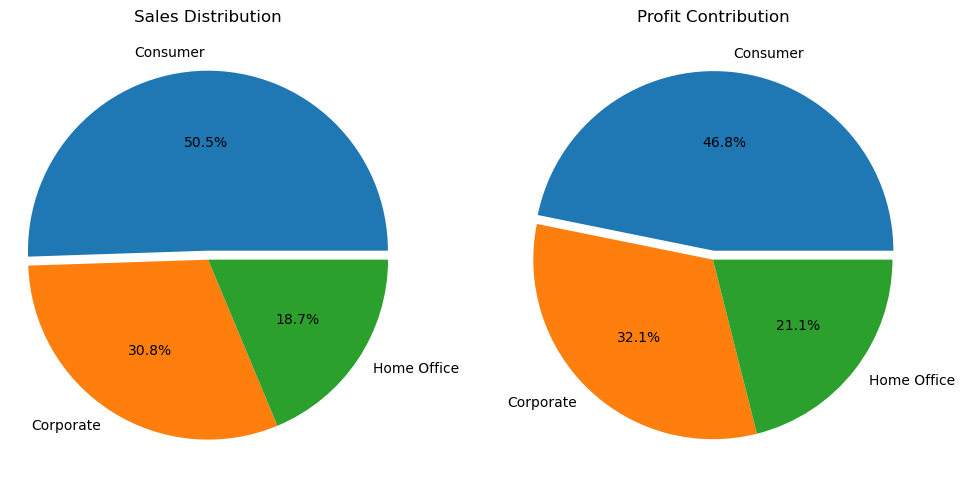

In [206]:
# Sales Distribution and Profit Contribution from each segment
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
Sales_per_segment = df.groupby('Segment')['Sales'].sum()
explode = (0.05,0,0)
plt.pie(Sales_per_segment,labels = Sales_per_segment.index,explode=explode, autopct = "%.1f%%")
plt.title("Sales Distribution")
plt.axis('equal')

plt.subplot(1,2,2)
profit_per_segment = df.groupby('Segment')['Profit'].sum()
explode = (0.05,0,0)
plt.pie(profit_per_segment,labels = profit_per_segment.index,explode=explode, autopct = "%.1f%%")
plt.title("Profit Contribution")
plt.axis('equal')

plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()


we can see that Sales Distribution is not directly proportional to Profit Contributions. The Consumer Segment has a higher sales share than its profit share, while the Corporate Segment has a higher profit share relative to its sales shares.
To know the reason behind that, we should see the correlation between columns.

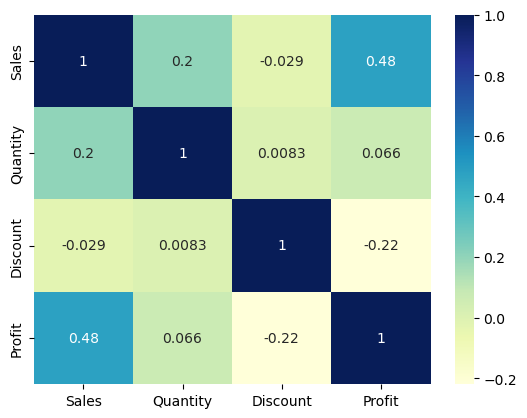

In [207]:
#Correlation Heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

There is a negative correlation between Discount and Profit which implies that more Discount leads less Profits. Let's see how much Discount was given to each segment.

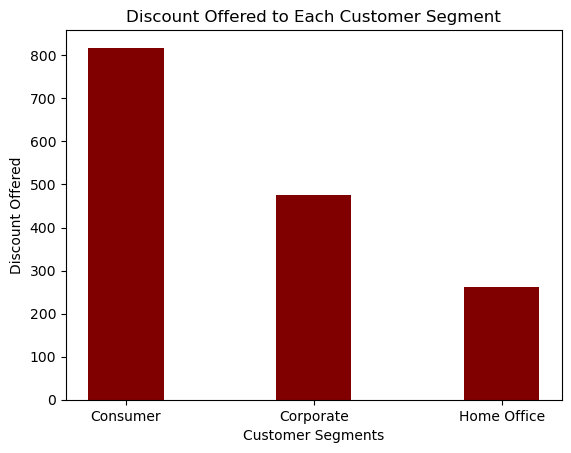

In [208]:
# Discount offered to each Segment
Discount_per_segment = df.groupby('Segment')['Discount'].sum()
plt.bar(Discount_per_segment.index,Discount_per_segment,color = 'maroon',width=0.4)
plt.xlabel("Customer Segments")
plt.ylabel("Discount Offered")
plt.title("Discount Offered to Each Customer Segment")
plt.show()

Now it is clear from the chart that the most Discount is given to Consumer Segment which led to Low Profit from Consumer Segment.

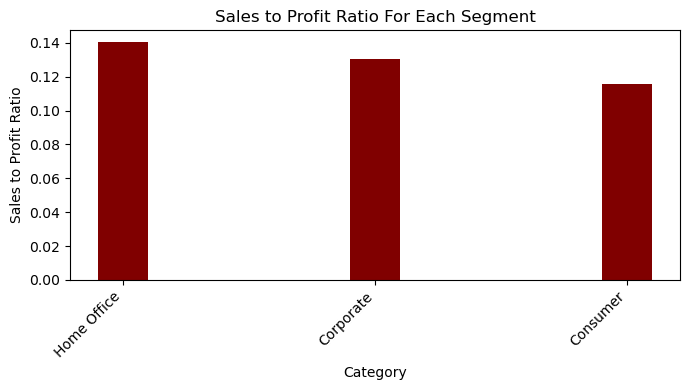

In [235]:
# Sales to Profit Ratio for each segment
sales_to_profit_ratio = profit_per_segment/Sales_per_segment

# Sort the DataFrame by sales to profit ratio in descending order for better visualization
sales_to_profit_ratio.sort_values(ascending=False, inplace=True)

# Create a bar plot to visualize the sales to profit ratio for each category
plt.figure(figsize=(7, 4))
plt.bar(sales_to_profit_ratio.index, sales_to_profit_ratio,width = 0.2,color = 'maroon')
plt.xlabel('Category')
plt.ylabel('Sales to Profit Ratio')
plt.title('Sales to Profit Ratio For Each Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Home Office Segment is the highest Contributor in company's financial growth because the discount offered is the least.

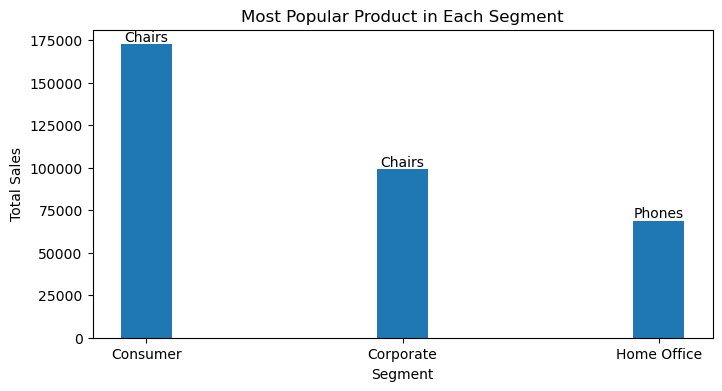

In [217]:
# Most Popular Product in each Segment
popular_products_sales = df.groupby(['Segment', 'Sub-Category'])['Sales'].sum().reset_index(name='Total Sales')
most_popular_products_sales = popular_products_sales.loc[popular_products_sales.groupby('Segment')['Total Sales'].idxmax()]

plt.figure(figsize=(8, 4))
plt.bar(most_popular_products_sales['Segment'], most_popular_products_sales['Total Sales'], width = 0.2)
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Most Popular Product in Each Segment')

# Adding labels to the bars
for i, value in enumerate(most_popular_products_sales['Total Sales']):
    plt.text(i, value, most_popular_products_sales['Sub-Category'].iloc[i], ha='center', va='bottom')

plt.show()

# Analyzing Sales and Profit From Each Region

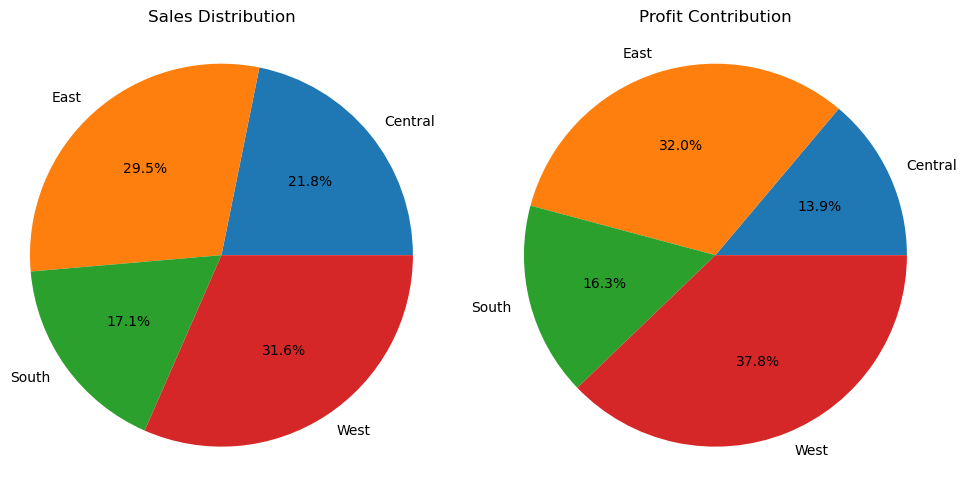

In [218]:
# Sales Distribution and Profit Contribution from each region
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Sales Distribution
Sales_per_region = df.groupby('Region')['Sales'].sum()
axs[0].pie(Sales_per_region, labels=Sales_per_region.index, autopct="%.1f%%")
axs[0].set_title("Sales Distribution")
axs[0].axis('equal')

# Profit Contribution
profit_per_region = df.groupby('Region')['Profit'].sum()
axs[1].pie(profit_per_region, labels=profit_per_region.index, autopct="%.1f%%")
axs[1].set_title("Profit Contribution")
axs[1].axis('equal')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=1)

# Adjust spacing between title and subplot
axs[0].title.set_position([0.5, 1])
axs[1].title.set_position([0.5, 1])

plt.tight_layout()
plt.show()





We can see that the Sales from Central region is much higher than profit from it. To analyze it more, let's look at discount offered in each region.

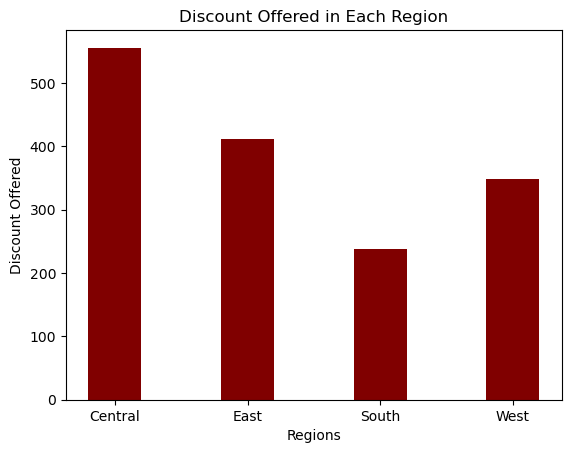

In [219]:
#Discount Offered in each Region
Discount_per_segment = df.groupby('Region')['Discount'].sum()
plt.bar(Discount_per_segment.index,Discount_per_segment,color = 'maroon',width=0.4)
plt.xlabel("Regions")
plt.ylabel("Discount Offered")
plt.title("Discount Offered in Each Region")
plt.show()

Discount offered in Central region is maximum which led to lower profit despite of substantial sales.

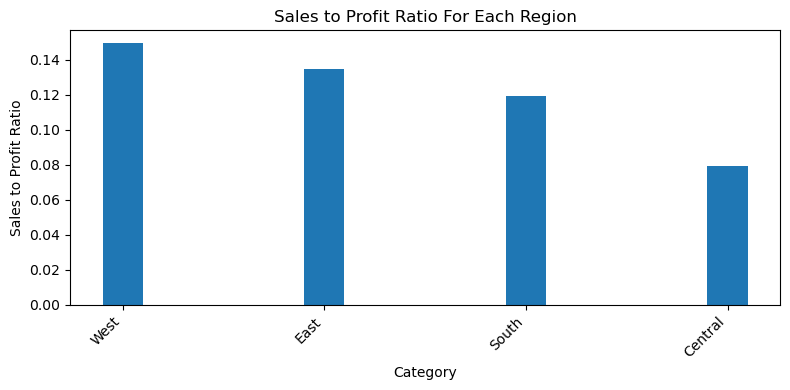

In [221]:
# Sales to Profit Ratio for each region
sales_to_profit_ratio = profit_per_region/Sales_per_region
# Sort the DataFrame by sales to profit ratio in descending order for better visualization
sales_to_profit_ratio.sort_values(ascending=False, inplace=True)

# Create a bar plot to visualize the sales to profit ratio for each category
plt.figure(figsize=(8, 4))
plt.bar(sales_to_profit_ratio.index, sales_to_profit_ratio, width = 0.2)
plt.xlabel('Region')
plt.ylabel('Sales to Profit Ratio')
plt.title('Sales to Profit Ratio For Each Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

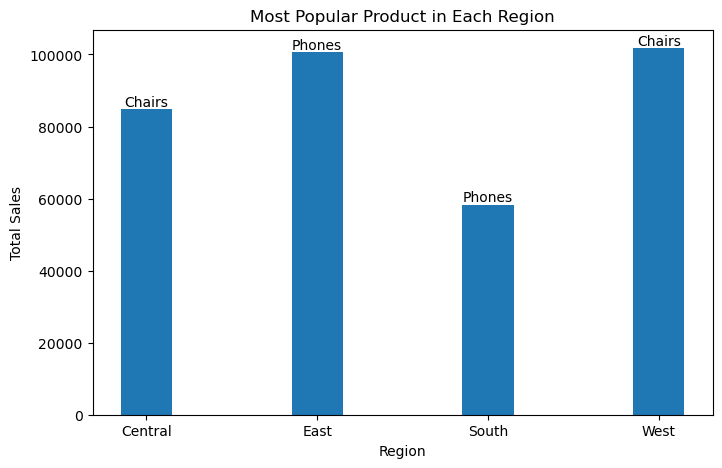

In [222]:
# Most popular product in each region
popular_products_sales = df.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index(name='Total Sales')
most_popular_products_sales = popular_products_sales.loc[popular_products_sales.groupby('Region')['Total Sales'].idxmax()]
plt.figure(figsize=(8, 5))
plt.bar(most_popular_products_sales['Region'], most_popular_products_sales['Total Sales'],width = 0.3)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Most Popular Product in Each Region')
# Adding labels to the bars
for i, value in enumerate(most_popular_products_sales['Total Sales']):
    plt.text(i, value, most_popular_products_sales['Sub-Category'].iloc[i], ha='center', va='bottom')
plt.show()

# Analyzing State Data

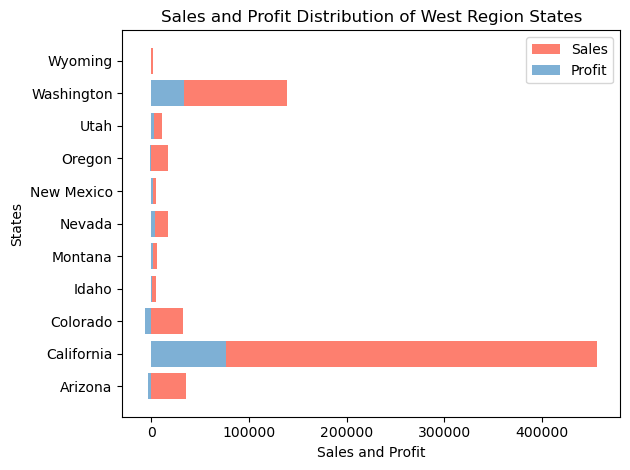

In [223]:
# Analyzing Sales and Profit for West Region
West_Region_sales = df[df['Region'] == "West"].groupby('State')['Sales'].sum()
plt.barh(West_Region_sales.index, West_Region_sales.values, color="#fd7f6f",label = 'Sales')  # Corrected order of arguments

# Profit subplot
West_Region_profit = df[df['Region'] == "West"].groupby('State')['Profit'].sum()
plt.barh(West_Region_profit.index, West_Region_profit.values, color="#7eb0d5",label = 'Profit')  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of West Region States")
plt.xlabel('Sales and Profit')
plt.ylabel('States')
plt.legend()
plt.tight_layout()
plt.show()



Due to high discount offered in california, the Profit from California sales decreased.

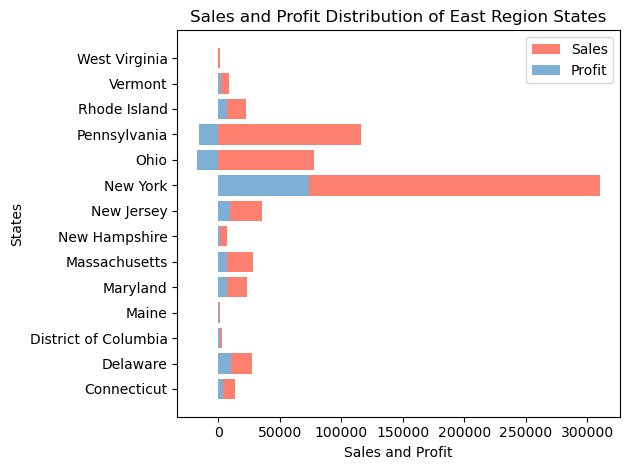

In [224]:
# Analyzing Sales and Profit for East Region
East_Region_sales = df[df['Region'] == "East"].groupby('State')['Sales'].sum()
plt.barh(East_Region_sales.index, East_Region_sales.values, color="#fd7f6f",label = 'Sales')  # Corrected order of arguments

# Profit subplot
East_Region_profit = df[df['Region'] == "East"].groupby('State')['Profit'].sum()
plt.barh(East_Region_profit.index, East_Region_profit.values, color="#7eb0d5",label = 'Profit')  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of East Region States")
plt.xlabel('Sales and Profit')
plt.ylabel('States')
plt.legend()
plt.tight_layout()
plt.show()


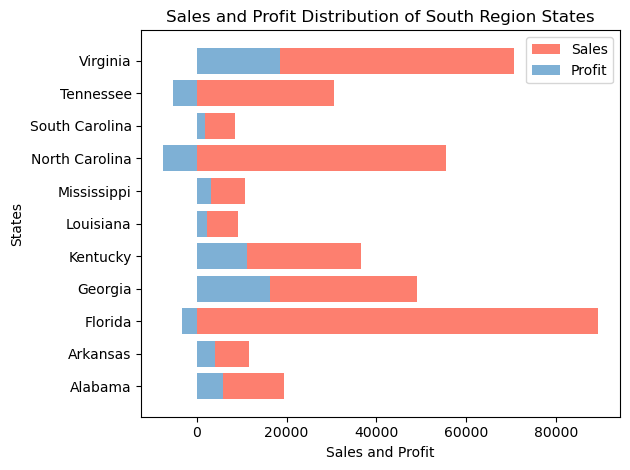

In [225]:
# Analyzing Sales and Profit for South Region
South_Region_sales = df[df['Region'] == "South"].groupby('State')['Sales'].sum()
plt.barh(South_Region_sales.index, South_Region_sales.values, color="#fd7f6f", label = 'Sales')  # Corrected order of arguments

# Profit subplot
South_Region_profit = df[df['Region'] == "South"].groupby('State')['Profit'].sum()
plt.barh(South_Region_profit.index, South_Region_profit.values, color="#7eb0d5", label = 'Profit')  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of South Region States")
plt.xlabel('Sales and Profit')
plt.ylabel('States')
plt.legend()
plt.tight_layout()
plt.show()

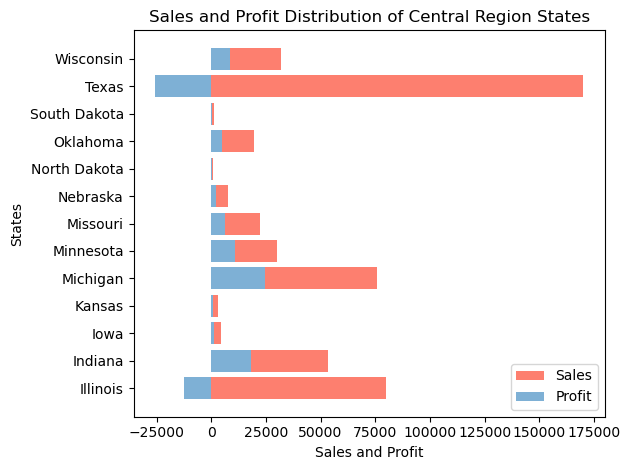

In [226]:
# Analyzing Sales and Profit for Central Region
Central_Region_sales = df[df['Region'] == "Central"].groupby('State')['Sales'].sum()
plt.barh(Central_Region_sales.index, Central_Region_sales.values, color="#fd7f6f", label = 'Sales')  # Corrected order of arguments

# Profit subplot
Central_Region_profit = df[df['Region'] == "Central"].groupby('State')['Profit'].sum()
plt.barh(Central_Region_profit.index, Central_Region_profit.values, color="#7eb0d5", label = 'Profit')  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of Central Region States")
plt.xlabel('Sales and Profit')
plt.ylabel('States')
plt.legend()
plt.tight_layout()
plt.show()

# Analyzing Product Category Data

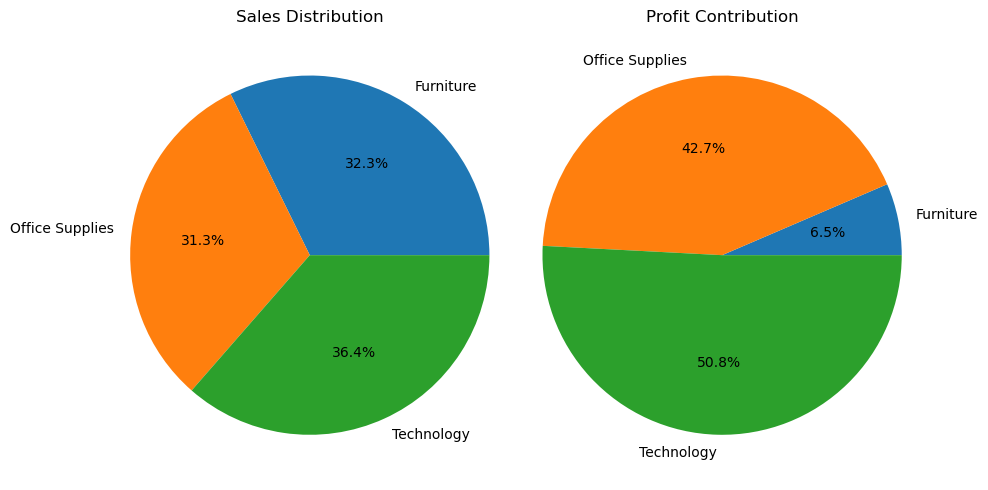

In [227]:
# # Sales Distribution of each Product Category
# Category_sale = df.groupby('Category')['Sales'].sum()
# plt.pie(Category_sale,labels = Category_sale.index,autopct = "%.1f%%")
# plt.axis('equal')
# plt.show()


# Sales Distribution and Profit Contribution from each region
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Sales Distribution
Sales_per_Category = df.groupby('Category')['Sales'].sum()
axs[0].pie(Sales_per_Category, labels=Sales_per_Category.index, autopct="%.1f%%")
axs[0].set_title("Sales Distribution")
axs[0].axis('equal')

# Profit Contribution
profit_per_Category = df.groupby('Category')['Profit'].sum()
axs[1].pie(profit_per_Category, labels=profit_per_Category.index, autopct="%.1f%%")
axs[1].set_title("Profit Contribution")
axs[1].axis('equal')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=1)

# Adjust spacing between title and subplot
axs[0].title.set_position([0.5, 1])
axs[1].title.set_position([0.5, 1])

plt.tight_layout()
plt.show()


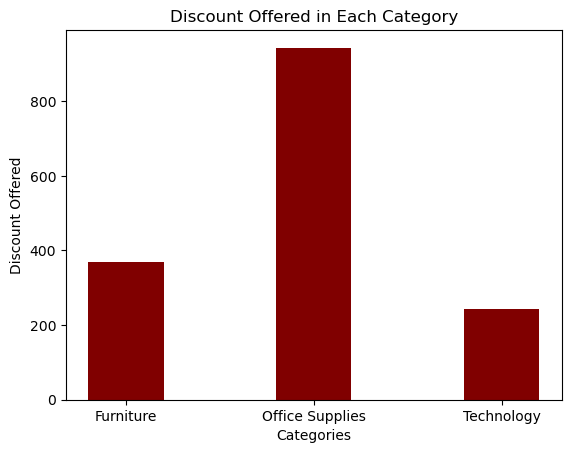

In [228]:
#Discount Offered in each Region
Discount_per_Category = df.groupby('Category')['Discount'].sum()
plt.bar(Discount_per_Category.index,Discount_per_Category,color = 'maroon',width=0.4)
plt.xlabel("Categories")
plt.ylabel("Discount Offered")
plt.title("Discount Offered in Each Category")
plt.show()

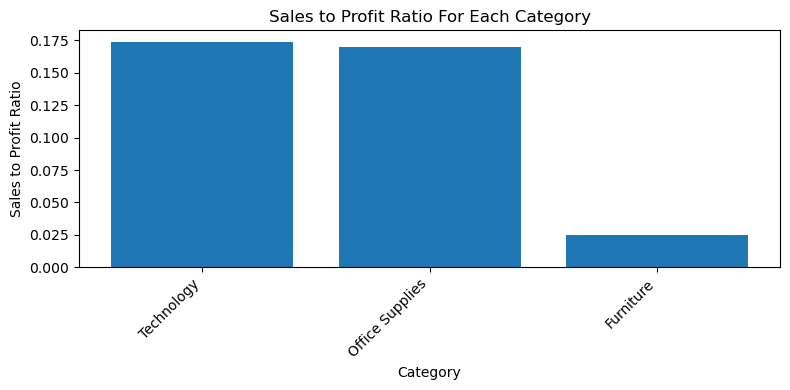

In [229]:
# Sales to Profit Ratio for each Category
sales_to_profit_ratio_Category = profit_per_Category/Sales_per_Category

# Sort the DataFrame by sales to profit ratio in descending order for better visualization
sales_to_profit_ratio_Category.sort_values(ascending=False, inplace=True)

# Create a bar plot to visualize the sales to profit ratio for each category
plt.figure(figsize=(8, 4))
plt.bar(sales_to_profit_ratio_Category.index, sales_to_profit_ratio_Category.values)
plt.xlabel('Category')
plt.ylabel('Sales to Profit Ratio')
plt.title('Sales to Profit Ratio For Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Index(['Category', 'Sub-Category', 'Total Sales'], dtype='object')


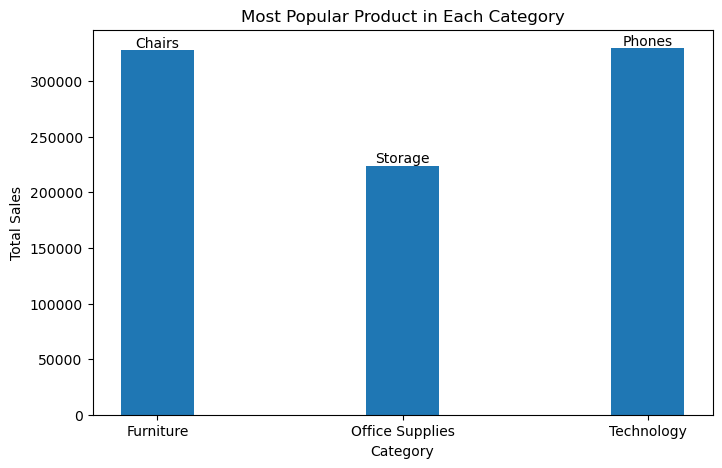

In [243]:
#Most Popular Product in Each Category
Popular_product = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index(name = 'Total Sales')
Most_popular_product = Popular_product.loc[Popular_product.groupby('Category')['Total Sales'].idxmax()]

# plot graph
plt.figure(figsize=(8, 5))
plt.bar(Most_popular_product['Category'], Most_popular_product['Total Sales'],width = 0.3)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Most Popular Product in Each Category')
# Adding labels to the bars
for i, value in enumerate(Most_popular_product['Total Sales']):
    plt.text(i, value, Most_popular_product['Sub-Category'].iloc[i], ha='center', va='bottom')
plt.show()

# Analyze Sub-Category Data

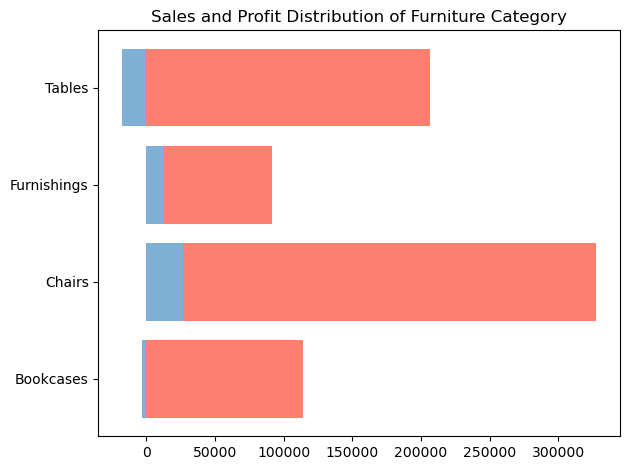

Sub-Category
Bookcases      -3398.7542
Chairs         26567.1278
Furnishings    13042.0534
Tables        -17725.4811
Name: Profit, dtype: float64


In [230]:
# Analyzing Sales and Profit for Furniture
Furniture_Category_sales = df[df['Category'] == "Furniture"].groupby('Sub-Category')['Sales'].sum()
plt.barh(Furniture_Category_sales.index, Furniture_Category_sales.values, color="#fd7f6f")  # Corrected order of arguments

# Profit subplot
Furniture_Category_profit = df[df['Category'] == "Furniture"].groupby('Sub-Category')['Profit'].sum()
plt.barh(Furniture_Category_profit.index, Furniture_Category_profit.values, color = "#7eb0d5")  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of Furniture Category")

plt.tight_layout()
plt.show()

print(Furniture_Category_profit)

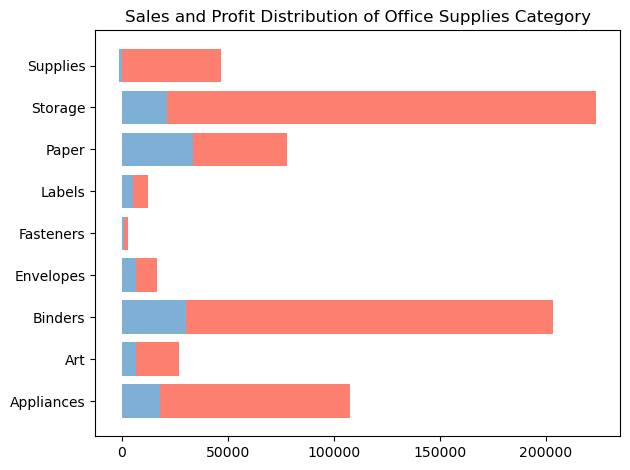

Sub-Category
Appliances    18138.0054
Art            6511.8388
Binders       30205.2603
Envelopes      6964.1767
Fasteners       949.5182
Labels         5499.1558
Paper         33830.0381
Storage       21287.1788
Supplies      -1189.0995
Name: Profit, dtype: float64


In [231]:
# Analyzing Sales and Profit for Office Supplies
Office_Category_sales = df[df['Category'] == "Office Supplies"].groupby('Sub-Category')['Sales'].sum()
plt.barh(Office_Category_sales.index, Office_Category_sales.values, color="#fd7f6f")  # Corrected order of arguments

# Profit subplot
Office_Category_profit = df[df['Category'] == "Office Supplies"].groupby('Sub-Category')['Profit'].sum()
plt.barh(Office_Category_profit.index, Office_Category_profit.values, color="#7eb0d5")  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of Office Supplies Category")

plt.tight_layout()
plt.show()

print(Office_Category_profit)

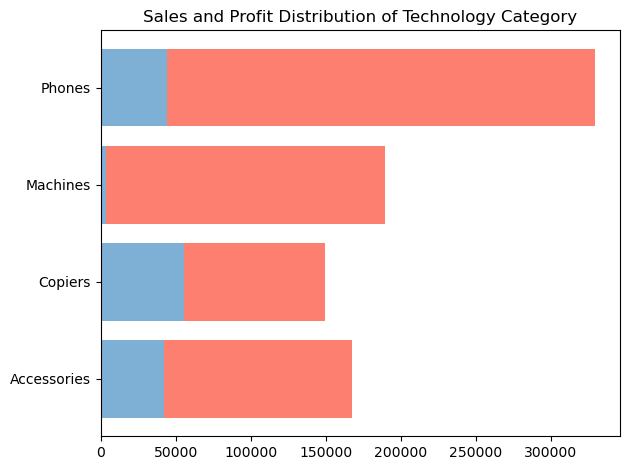

Sub-Category
Accessories    41920.9052
Copiers        55617.8249
Machines        3384.7569
Phones         44493.0524
Name: Profit, dtype: float64


In [232]:
# Analyzing Sales and Profit for Technology
Technology_Category_sales = df[df['Category'] == "Technology"].groupby('Sub-Category')['Sales'].sum()
plt.barh(Technology_Category_sales.index, Technology_Category_sales.values, color="#fd7f6f")  # Corrected order of arguments

# Profit subplot
Technology_Category_profit = df[df['Category'] == "Technology"].groupby('Sub-Category')['Profit'].sum()
plt.barh(Technology_Category_profit.index, Technology_Category_profit.values, color="#7eb0d5")  # Corrected order of arguments
plt.title(f"Sales and Profit Distribution of Technology Category")

plt.tight_layout()
plt.show()

print(Technology_Category_profit)